<a href="https://colab.research.google.com/github/NikitaKarasyov/LAB_work/blob/main/lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

> **Напоминание**
>
>Минимальные баллы для получения зачёта по этой работе - **1 балл**. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд (см. слайды с вводной презентации).

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [4]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 253MB/s]


Начнем с необходимых приготовлений.

In [33]:
!pip install mplfinance
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.express as px
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Загрузите заранее подготовленный датасет из файла *"coins.csv"*. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [6]:
coins = pd.read_csv('coins.csv')
coins.date = pd.to_datetime(coins.date)
coins.set_index('date', inplace = True)

Посмотрим что получилось

In [7]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [8]:
coins['name'].value_counts()

Bitcoin         1866
Litecoin        1866
Dogecoin        1635
Vertcoin        1599
DigiByte        1582
                ... 
Zilliqa          133
Polymath         125
Centrality        86
Loom Network      85
Cortex            52
Name: name, Length: 70, dtype: int64

### 2. За какой период данные мы имеем? (0.4 балла)

In [11]:
print('from', coins.index.min(),'to',coins.index.max(), 'it is', coins.index.max() - coins.index.min())

from 2013-04-28 00:00:00 to 2018-06-06 00:00:00 it is 1865 days 00:00:00


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [12]:
print(coins.info())
coins[coins.volume==0]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37588 entries, 2013-04-28 to 2018-06-06
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            37261 non-null  float64
 1   txCount          36068 non-null  float64
 2   txVolume         35758 non-null  float64
 3   activeAddresses  36068 non-null  float64
 4   symbol           37588 non-null  object 
 5   name             37588 non-null  object 
 6   open             37588 non-null  float64
 7   high             37588 non-null  float64
 8   low              37588 non-null  float64
 9   close            37588 non-null  float64
 10  volume           37588 non-null  float64
 11  market           37588 non-null  float64
dtypes: float64(10), object(2)
memory usage: 3.7+ MB
None


,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
2013-04-30,144.00,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-28,10.67,NaN,NaN,NaN,REP,Augur,10.670000,10.680000,10.280000,10.280000,0.0,0.000000e+00
2017-09-10,NaN,576.0,NaN,593.0,VEN,VeChain,0.048004,0.057875,0.047648,0.049022,0.0,0.000000e+00
2017-09-11,NaN,627.0,NaN,627.0,VEN,VeChain,0.049022,0.055699,0.047485,0.050420,0.0,0.000000e+00


В колонках txCount, price, txVolume, activeAddresses есть пропуски формата Nan, в графе volume часть ячеек, заполненная нулями.
Я думаю пропуски Nan могли возникнуть из-за сбоев в сети блокчейна, а нулевой объем либо из-за того что в 2013 года криптовалюта была не так востребавана и за день могло не быть сделок, либо криптобиржи которые только появились ошибочно показывали данные.

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [13]:
coins[coins.price == coins.price.max()][['name', 'price']]


,name,price
date,,
2017-12-17,Bitcoin,19475.8


### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

'Диаграмма'

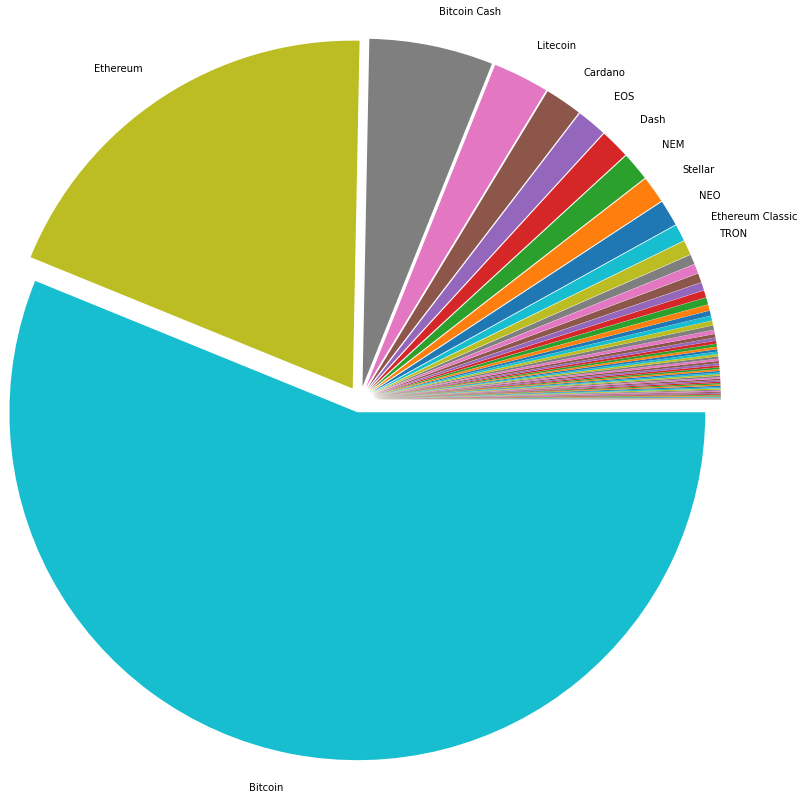

In [16]:
df_market = coins.groupby('name').market.sum().reset_index().sort_values(by = 'market')
df_market['new_names'] = [*['']*(len(df_market) - 12), *df_market.name[len(df_market) - 12:]] 
plt.pie(df_market.market, labels = df_market.new_names, explode = [0.15]*len(df_market), radius = 4)
'Диаграмма'

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), но можно и без него.

In [22]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    ohlc = coins[coins.symbol == symbol][pd.to_datetime(start_date):pd.to_datetime(end_date)]
    mpf.plot(ohlc, type='candle', mav=(3,6,9) , volume=True, style='charles', title = symbol, scale_padding = 0.3)

Посмотрим, что получилось:

/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


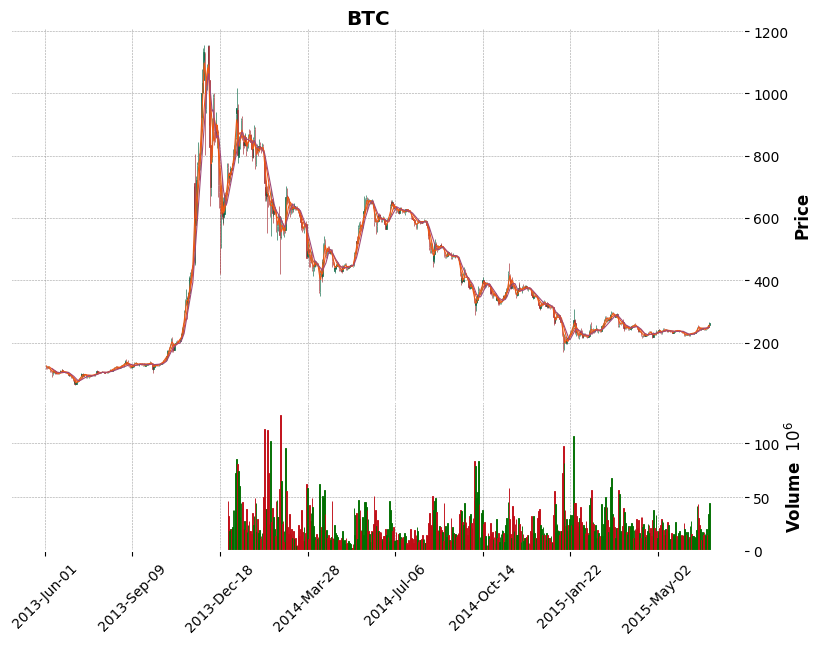

In [26]:
plot_fancy_price_action(coins=coins, symbol='BTC', start_date='2013-06-01', end_date='2015-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [27]:
coins['pnd'] =coins.high/np.maximum(coins.open, coins.close)
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    info = coins[coins.symbol == symbol][pd.to_datetime(start_date):pd.to_datetime(end_date)]
    return {'date': info.pnd.idxmax() , 'value': info.pnd.max()}

In [32]:
find_most_severe_pump_and_dump(coins, symbol='DGB', start_date='2017-06-01', end_date='2018-06-01')

{'date': Timestamp('2017-12-17 00:00:00'), 'value': 1.359942799461642}

Сравните эти значения для разных монет:

In [34]:
px.histogram(coins, x="symbol", y="pnd", labels={'symbol':'Name', 'pnd':'Pump\'n\'Dump value'}, histfunc='max', title='Statistics').show()


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [35]:
def compute_roi(coins, investments, start_date, end_date):
    inv = pd.Series(investments.values(), index = investments.keys())
    our_c = coins.reset_index().set_index('symbol').loc[investments.keys()]
    return np.sum(inv*our_c[our_c.date == end_date].price/our_c[our_c.date == start_date].price)/np.sum(inv) - 1

In [36]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.03556913306527565

In [37]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [38]:
def plot_bollinger_bands(coins, symbol, window, width):
    coin = coins[coins.symbol == symbol].price
    func =coin.rolling(window)
    moving_average, moving_std = func.mean(), func.std()
    
    plt.plot(coin)
    plt.plot(moving_average + moving_std, color='red')
    plt.plot(moving_average - moving_std,  color='orange')
    
    plt.legend(['Price', 'Upper-band', 'Down-Band'])
    plt.ylabel("Price, $")
    plt.xlabel("Time")
    plt.title(symbol)

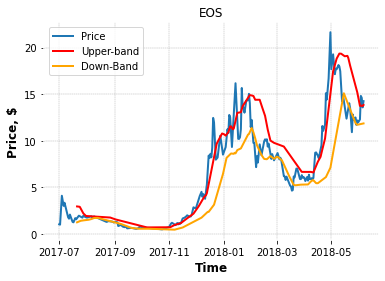

In [42]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Выполнялось, но невсегда. Можно сделать вывод что ни один технический индикатор не может дать 100% точность и нельзя в анализе опираться только на один индикатор**

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [45]:
def plotting(df, symbols, txt):
    plt.figure()
    for symbol in symbols:
        plt.plot(df.loc[symbol].date, df.loc[symbol].market)
    plt.legend(symbols)
    plt.ylabel(txt+', $')
    plt.xlabel("Time")

def plot_coins_capitalizations(coins, symbols, start_date):
    coins = coins.reset_index()
    df = coins[coins.symbol.isin(symbols) & (coins.date >= start_date)].set_index('symbol')[['date', 'market']]
    plotting(df, symbols, 'Cap')
    df = df.reset_index().set_index('date')
    df.market /= coins[coins.date >= start_date].groupby('date').market.sum() 
    plotting(df.reset_index().set_index('symbol'), symbols, 'Prop. of Cap')

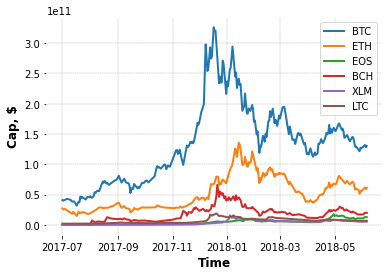

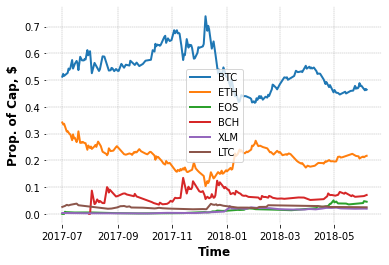

In [46]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**По первому графику видно, что колебания в капитализации альткоинов следуют четкому тренду биткоина, так как в процентах от своей капитализации коины теряют и наращивают примерно одинаковые с биткоином значения (например, 32%), то в процентах от общей капитализации они наоборот вырастают, ведь деньги из биткоина с рынка ушли большие, что незначительно по сравнению с капитализацией альткоинов, поэтому даже учитывая, что их общая капитализация на фоне падения биткоина снизилась, их относительная капитализация растёт. Наблюдается тренд на "отзеркаливание" относительной капитализации биткоина. Это и есть причина такого виде графиков - биткоин вниз, альткоины - наверх.**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

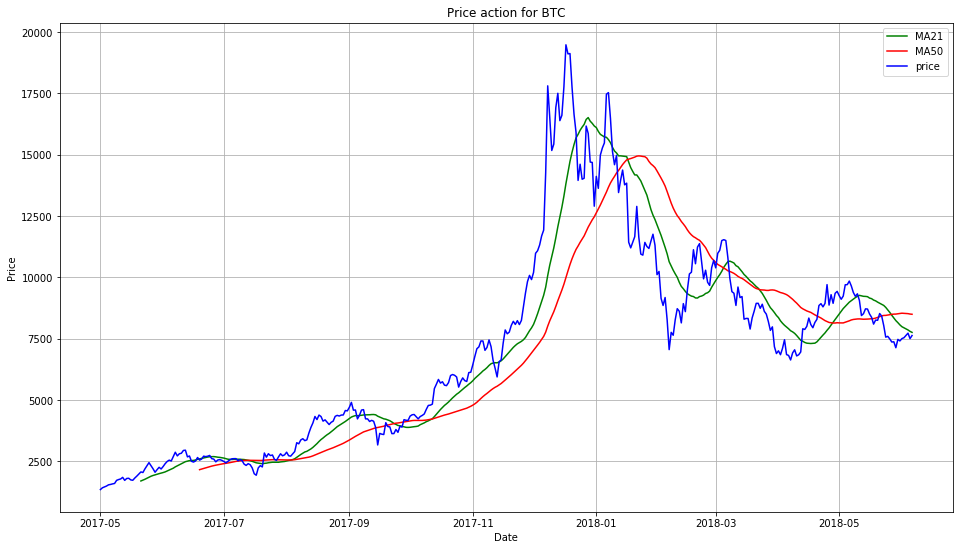

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.